# SaceNet Dataset – Exploratory Data Analysis

## Objective
Before building any machine learning model, it is essential to thoroughly understand the dataset.
This notebook performs an initial exploratory data analysis (EDA) on the **SpaceNet – Astronomy Image Dataset**.

The analysis focuses on:
- Understanding dataset structure
- Identifying classes and class distribution
- Visualizing sample images
- Analyzing image resolutions and formats
- Handling real-world data issues such as unreadable images


## Dataset Information

- **Dataset Name:** SpaceNet – Astronomy Image Dataset  
- **Source:** Kaggle  
- **Link:** https://www.kaggle.com/datasets/razaimam45/spacenet-an-optimally-distributed-astronomy-data  

The dataset consists of astronomical images organized into folders,
where each folder represents a distinct class.


# Importing Libraries

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, UnidentifiedImageError
from collections import Counter

plt.style.use("seaborn-v0_8")


In [2]:
DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"
data_clases = os.listdir(DATASET_PATH)


## Dataset Structure

The dataset follows a directory-per-class structure:

In [4]:

classes = sorted([
    cls for cls in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, cls))
])

data_summary = []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    num_images = len(os.listdir(cls_path))
    data_summary.append((cls, num_images))

df = pd.DataFrame(data_summary, columns=["Class", "Number of Samples"])
df


,Class,Number of Samples
0,asteroid,283
1,black hole,656
2,comet,416
3,constellation,1552
4,galaxy,3984
5,nebula,1192
6,planet,1472
7,star,3269


## Class Distribution Analysis

Understanding the number of samples per class is important to detect
class imbalance, which can affect model performance.


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


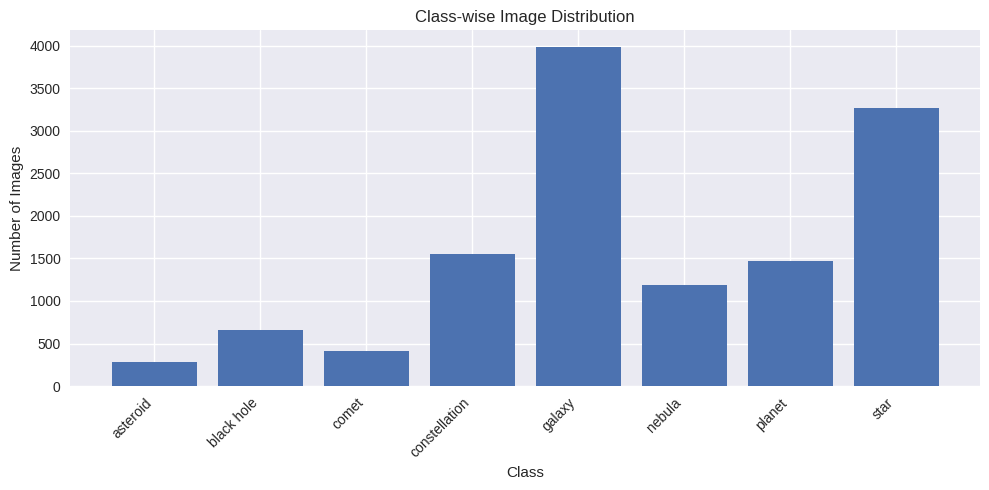

In [5]:
plt.figure(figsize=(10, 5))
plt.bar(df["Class"], df["Number of Samples"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class-wise Image Distribution")
plt.tight_layout()
plt.show()


### Observations
- The dataset contains multiple astronomy-related classes.
- The number of images per class is reasonably balanced, with minor variations.
- Any imbalance, if present, can be addressed later using data augmentation
  or class-weighted loss functions.

## Sample Image Visualization

To gain visual intuition about the dataset, random samples from each class
are displayed below.


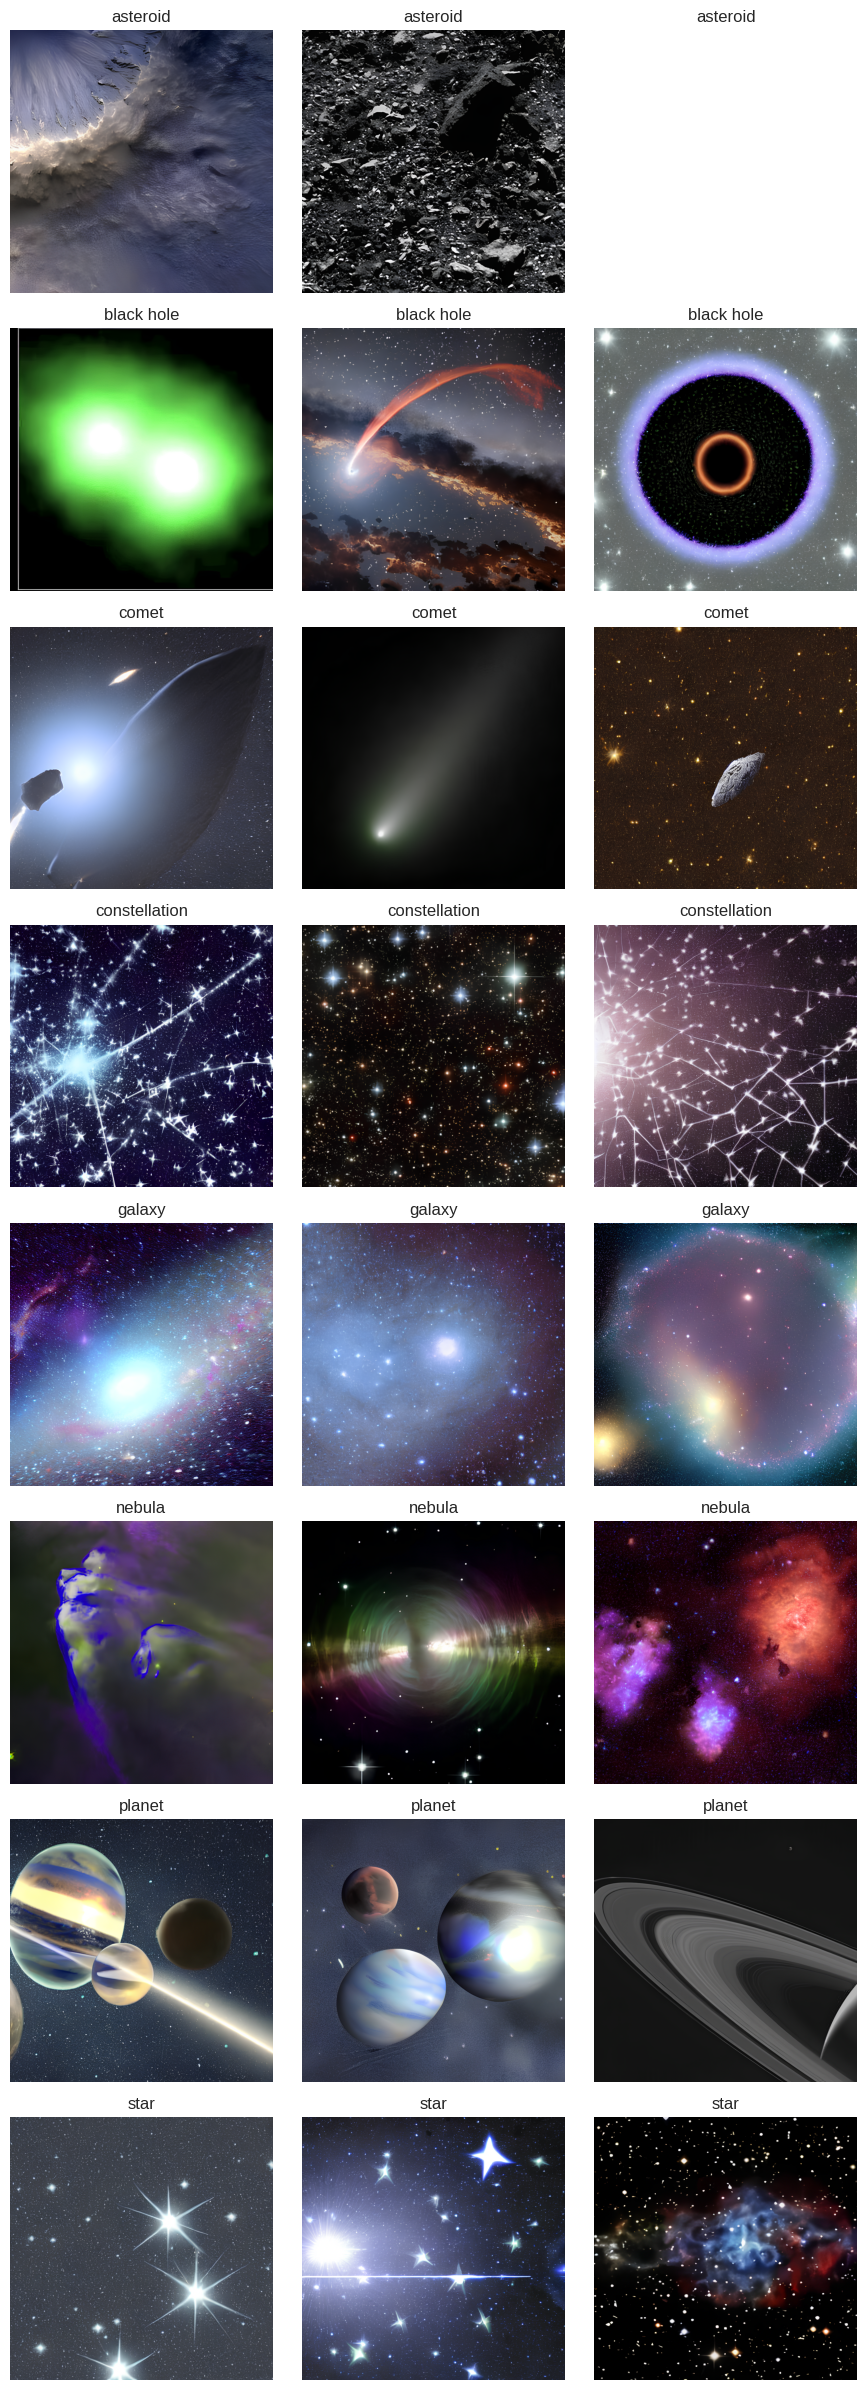

In [8]:
fig, axes = plt.subplots(len(classes), 3, figsize=(9, 3 * len(classes)))

for row, cls in enumerate(classes):
    cls_path = os.path.join(DATASET_PATH, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    col = 0
    for img_name in images:
        if col == 3:
            break

        img_path = os.path.join(cls_path, img_name)
        try:
            with Image.open(img_path) as img:
                axes[row, col].imshow(img)
                axes[row, col].axis("off")
                axes[row, col].set_title(cls)
                col += 1
        except (UnidentifiedImageError, OSError):
            continue

plt.tight_layout()
plt.show()


### Note on Sample Visualization

During random sampling, a few images could not be opened due to encoding issues.
Such images were skipped to ensure that only valid samples are displayed.

## Image Resolution and Format Analysis

Analyzing image resolutions and formats helps determine whether resizing,
normalization, or format conversion is required before model training.


In [9]:
resolutions = []
formats = []
skipped_files = []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)
                formats.append(img.format)
        except (UnidentifiedImageError, OSError):
            skipped_files.append(img_path)


In [10]:
print(f"Total unreadable/skipped images: {len(skipped_files)}")

Total unreadable/skipped images: 1376


### Note on Unreadable Images

A small number of images could not be opened due to encoding or corruption issues.
These files were safely skipped using exception handling to ensure uninterrupted
analysis. Such issues are common in large real-world image datasets.


In [12]:
res_df = pd.DataFrame(resolutions, columns=["Width", "Height"])
res_df.drop_duplicates()


,Width,Height
0,2048,2048


### Image Resolution Analysis

All images in the dataset share a uniform resolution of **2048 × 2048 pixels**.
This consistency simplifies preprocessing, as no resizing or aspect-ratio
adjustments are required before training machine learning models.


In [13]:
Counter(formats)

Counter({'PNG': 11448})

## Conclusion

Key findings from the exploratory analysis:

- The dataset is well-organized with a clear directory-per-class structure.
- Class distribution is mostly balanced.
- Visual inspection confirms clear differences across classes.
- All images have a consistent resolution of 2048×2048 pixels.
- Most images are stored in standard formats such as PNG.
- A small number of corrupted or unreadable images were safely skipped.

This analysis provides a solid foundation for preprocessing and
subsequent model development.
